<a href="https://colab.research.google.com/github/ishujaswani/Stock-Market/blob/Portfolio-Management/Optimising_portfolios_by_allocating_efficient_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

formula for sharpe ratio is 
s=(rp-rf)/sd of prot
1. daily return
2. cummalative return
3. avg daily return - mean of daily return
4. std daily return - standard daily returns

SHarpe Ratio is the ratio which decides the risk of the portfolio.
Formula for sharpe ratio.
s = (rp-rf)/std of protfolio
- rf- bank savings account, LIBOR, treasury bond

US - assumes that RF is 0 as for a lomg time in US the RF rates in US have been close to 0. therefore in this module we assume the risk free rate to be 0

SR = mean return / std 
Sharpe ratio was intended to be used of mean retun for the year. 
here we have to use mean daily return therefore in order to fix this,

The annualised sharpe ration can be deannualised by multiplying a k-factor - 
- daily return - k=sqrt(252) # 252 business days in a year
- weekly return - K=sqrt(52)
- monthly return - k=sqrt(12)

if i already have yearly data for the sharpe ratio i dont have to do any sort

In [ ]:
pip install quandl

In [ ]:
import pandas as pd
import numpy as np
import quandl
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [ ]:
# tech stocks

In [ ]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2021-01-20')

In [ ]:
aapl = web.DataReader('AAPL','yahoo',start,end)
cisco = web.DataReader('CSCO','yahoo',start,end)
ibm = web.DataReader('IBM','yahoo',start,end)
amzn = web.DataReader('AMZN','yahoo',start,end)

In [ ]:
aapl['Adj Close'].iloc[0]

24.89855194091797

In [ ]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['normed return'] = stock_df['Adj Close'] / stock_df['Adj Close'].iloc[0]


In [ ]:
cisco.head()

,High,Low,Open,Close,Volume,Adj Close,normed return
Date,,,,,,,
2015-01-02,28.120001,27.379999,27.860001,27.610001,22926500.0,22.780064,1.000000
2015-01-05,27.450001,27.000000,27.320000,27.059999,29460600.0,22.326277,0.980080
2015-01-06,27.680000,27.040001,27.139999,27.049999,47297600.0,22.318022,0.979717
2015-01-07,27.400000,26.980000,27.139999,27.299999,27570800.0,22.524290,0.988772
2015-01-08,28.090000,27.469999,27.540001,27.510000,40907000.0,22.697554,0.996378


In [ ]:
# 30% in apple
# 20% in cisco
# 40% in ibm
# 10% in amzn

In [ ]:
list(zip((aapl,cisco,ibm,amzn),[0.3,0.2,0.4,0.1]))

[(                  High         Low  ...   Adj Close  normed return
  Date                                ...                           
  2015-01-02   27.860001   26.837500  ...   24.898552       1.000000
  2015-01-05   27.162500   26.352501  ...   24.197117       0.971828
  2015-01-06   26.857500   26.157499  ...   24.199400       0.971920
  2015-01-07   27.049999   26.674999  ...   24.538729       0.985548
  2015-01-08   28.037500   27.174999  ...   25.481558       1.023415
  ...                ...         ...  ...         ...            ...
  2021-01-08  132.630005  130.229996  ...  132.050003       5.303521
  2021-01-11  130.169998  128.500000  ...  128.979996       5.180221
  2021-01-12  129.690002  126.860001  ...  128.800003       5.172992
  2021-01-13  131.449997  128.490005  ...  130.889999       5.256932
  2021-01-14  131.000000  128.899994  ...  129.009995       5.181426
  
  [1520 rows x 7 columns], 0.3),
 (                 High        Low  ...  Adj Close  normed return
 

In [ ]:
for stock_df,allo in zip((aapl,cisco,ibm,amzn),[0.3,0.2,0.4,0.1]):
    stock_df['allocation'] = stock_df['normed return']*allo

In [ ]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close,normed return,allocation
Date,,,,,,,,
2021-01-08,132.630005,130.229996,132.429993,132.050003,104965400.0,132.050003,5.303521,1.591056
2021-01-11,130.169998,128.500000,129.190002,128.979996,100620900.0,128.979996,5.180221,1.554066
2021-01-12,129.690002,126.860001,128.500000,128.800003,91951100.0,128.800003,5.172992,1.551898
2021-01-13,131.449997,128.490005,128.759995,130.889999,88636800.0,130.889999,5.256932,1.577080
2021-01-14,131.000000,128.899994,130.800003,129.009995,68993379.0,129.009995,5.181426,1.554428


In [ ]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['positional value'] = stock_df['allocation']*1000000

In [ ]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,normed return,allocation,positional value
Date,,,,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.898552,1.000000,0.300000,300000.000000
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.197117,0.971828,0.291548,291548.483332
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.199400,0.971920,0.291576,291575.992116
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.538729,0.985548,0.295665,295664.528269
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.481558,1.023415,0.307025,307024.576046


In [ ]:
allpos = [aapl['positional value'],cisco['positional value'],ibm['positional value'],amzn['positional value']]
port_value = pd.concat(allpos,axis=1)

In [ ]:
port_value

,positional value,positional value,positional value,positional value
Date,,,,
2015-01-02,3.000000e+05,200000.000000,400000.000000,1.000000e+05
2015-01-05,2.915485e+05,196015.929917,393706.014771,9.794827e+04
2015-01-06,2.915760e+05,195943.454220,385215.330599,9.571179e+04
2015-01-07,2.956645e+05,197754.408868,382697.717168,9.672631e+04
2015-01-08,3.070246e+05,199275.594697,391015.554743,9.738753e+04
...,...,...,...,...
2021-01-08,1.591056e+06,395609.091413,407257.623139,1.031603e+06
2021-01-11,1.554066e+06,398242.966734,407416.061824,1.009403e+06
2021-01-12,1.551898e+06,402018.200309,409412.282890,1.011549e+06


In [ ]:
port_value.columns = ['AAPL POS','CISCO POS','IBM POS','AMZN POS']

In [ ]:
port_value

,AAPL POS,CISCO POS,IBM POS,AMZN POS
Date,,,,
2015-01-02,3.000000e+05,200000.000000,400000.000000,1.000000e+05
2015-01-05,2.915485e+05,196015.929917,393706.014771,9.794827e+04
2015-01-06,2.915760e+05,195943.454220,385215.330599,9.571179e+04
2015-01-07,2.956645e+05,197754.408868,382697.717168,9.672631e+04
2015-01-08,3.070246e+05,199275.594697,391015.554743,9.738753e+04
...,...,...,...,...
2021-01-08,1.591056e+06,395609.091413,407257.623139,1.031603e+06
2021-01-11,1.554066e+06,398242.966734,407416.061824,1.009403e+06
2021-01-12,1.551898e+06,402018.200309,409412.282890,1.011549e+06


In [ ]:
# total position
port_value['total']= port_value.sum(axis=1)

In [ ]:
port_value

,AAPL POS,CISCO POS,IBM POS,AMZN POS,total
Date,,,,,
2015-01-02,3.000000e+05,200000.000000,400000.000000,1.000000e+05,1.000000e+06
2015-01-05,2.915485e+05,196015.929917,393706.014771,9.794827e+04,9.792187e+05
2015-01-06,2.915760e+05,195943.454220,385215.330599,9.571179e+04,9.684466e+05
2015-01-07,2.956645e+05,197754.408868,382697.717168,9.672631e+04,9.728430e+05
2015-01-08,3.070246e+05,199275.594697,391015.554743,9.738753e+04,9.947033e+05
...,...,...,...,...,...
2021-01-08,1.591056e+06,395609.091413,407257.623139,1.031603e+06,3.425526e+06
2021-01-11,1.554066e+06,398242.966734,407416.061824,1.009403e+06,3.369128e+06
2021-01-12,1.551898e+06,402018.200309,409412.282890,1.011549e+06,3.374877e+06


Text(0.5, 1.0, 'portfolio value')

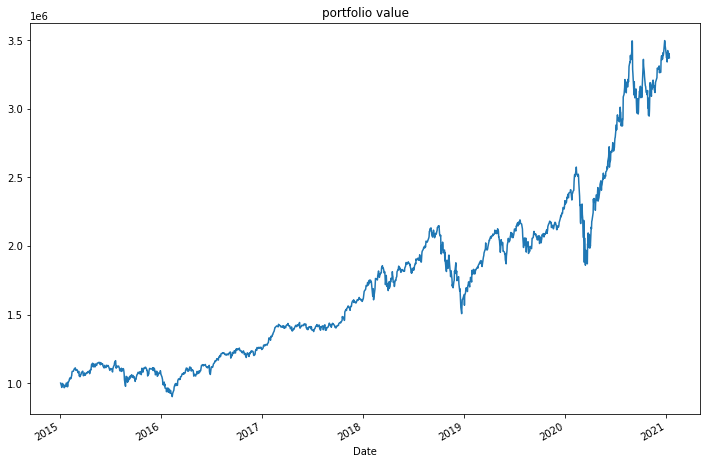

In [ ]:
port_value['total'].plot(figsize=(12,8))
plt.title('portfolio value')

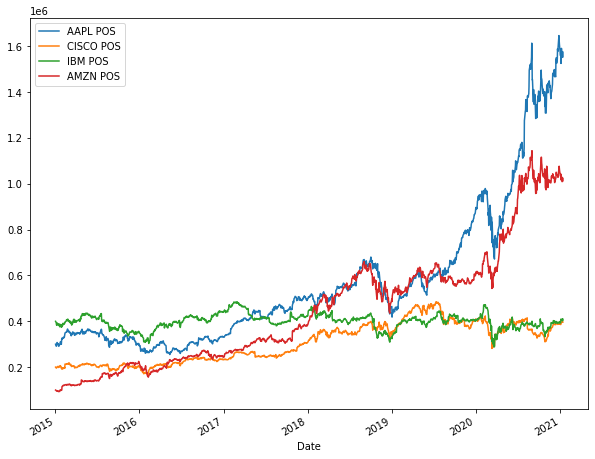

In [ ]:
fig = port_value.drop('total',axis=1).plot(figsize=(10,8))

# portfolio stats

In [ ]:
# port_value.drop('daily return',axis=1,inplace=True)

In [ ]:
port_value['daily ret check'] = port_value['total'].pct_change(1)

In [ ]:
port_value.head()

,AAPL POS,CISCO POS,IBM POS,AMZN POS,total,daily ret check
Date,,,,,,
2015-01-02,300000.000000,200000.000000,400000.000000,100000.000000,1000000.000000,NaN
2015-01-05,291548.483332,196015.929917,393706.014771,97948.273435,979218.701456,-0.020781
2015-01-06,291575.992116,195943.454220,385215.330599,95711.791475,968446.568411,-0.011001
2015-01-07,295664.528269,197754.408868,382697.717168,96726.314033,972842.968338,0.004540
2015-01-08,307024.576046,199275.594697,391015.554743,97387.528249,994703.253735,0.022471


In [ ]:
port_value['daily return'] = (port_value['total'] / port_value['total'].shift(periods=1))-1

In [ ]:
port_value.drop('daily ret check',axis=1,inplace=True)

In [ ]:
port_value.head()

,AAPL POS,CISCO POS,IBM POS,AMZN POS,total,daily return
Date,,,,,,
2015-01-02,300000.000000,200000.000000,400000.000000,100000.000000,1000000.000000,NaN
2015-01-05,291548.483332,196015.929917,393706.014771,97948.273435,979218.701456,-0.020781
2015-01-06,291575.992116,195943.454220,385215.330599,95711.791475,968446.568411,-0.011001
2015-01-07,295664.528269,197754.408868,382697.717168,96726.314033,972842.968338,0.004540
2015-01-08,307024.576046,199275.594697,391015.554743,97387.528249,994703.253735,0.022471


In [ ]:
port_value['daily return'].mean()

0.0009043629689743614

In [ ]:
port_value['daily return'].std()

0.014378464632141463

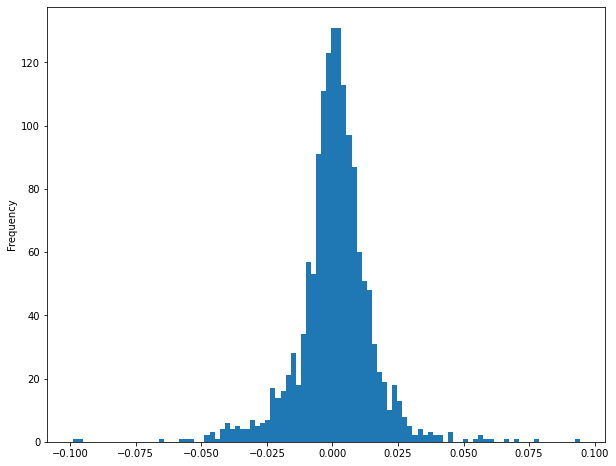

In [ ]:
port_value['daily return'].plot(kind='hist',bins=100,figsize=(10,8))

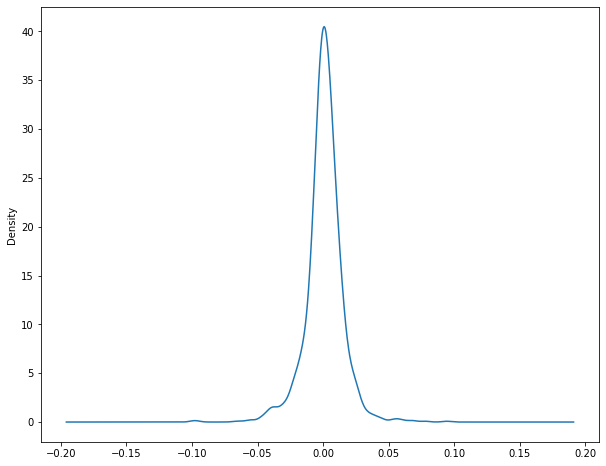

In [ ]:
port_value['daily return'].plot(kind='kde',figsize=(10,8))

In [ ]:
# over all purcentage on return
cmulative_return = 100*(port_value['total'][-1]/port_value['total'][0] - 1)

In [ ]:
cmulative_return

237.33233811655262

In [ ]:
port_value['total'][-1]

3373323.3811655263

# sharpe ratio

In [ ]:
SR = port_value['daily return'].mean()/port_value['daily return'].std()

In [ ]:
SR

0.06289704722385715

In [ ]:
ASR = math.sqrt(252)*SR

In [ ]:
ASR

0.9984596709276692

In [ ]:
# SR less than 1 is not that g as risk is higher
# SR more than 1 is considered good as return more then risk(volitility)
# SR more than 2 is deemed very good 
# SR more than 3 is very safe and is very difficult to get such a ratio in the stock market

In [ ]:
stocks = pd.concat([aapl['Adj Close'],cisco['Adj Close'],ibm['Adj Close'],amzn['Adj Close']],axis=1)

In [ ]:
stocks.columns=['apple Adj Close','Cisco Adj Close','IBM Adj Close','Amzn Adj Close']

In [ ]:
stocks.head()

,apple Adj Close,Cisco Adj Close,IBM Adj Close,Amzn Adj Close
Date,,,,
2015-01-02,24.898552,22.780064,126.239502,308.519989
2015-01-05,24.197117,22.326277,124.253128,302.190002
2015-01-06,24.199400,22.318022,121.573479,295.290009
2015-01-07,24.538729,22.524290,120.778923,298.420013
2015-01-08,25.481558,22.697554,123.404022,300.459991


In [ ]:
stocks.pct_change(1).mean()

apple Adj Close    0.001258
Cisco Adj Close    0.000592
IBM Adj Close      0.000141
Amzn Adj Close     0.001714
dtype: float64

In [ ]:
stocks.pct_change(1).corr()

,apple Adj Close,Cisco Adj Close,IBM Adj Close,Amzn Adj Close
apple Adj Close,1.000000,0.568217,0.469813,0.554905
Cisco Adj Close,0.568217,1.000000,0.600705,0.453697
IBM Adj Close,0.469813,0.600705,1.000000,0.351488
Amzn Adj Close,0.554905,0.453697,0.351488,1.000000


### Lograthimic returns vs Arithmatic returns

log ret is continuously compounded and gives a normalied return, can be added but only 1 stock. 

In [ ]:
log_ret = np.log(stocks/stocks.shift(periods=1))
log_ret.head()

,apple Adj Close,Cisco Adj Close,IBM Adj Close,Amzn Adj Close
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.020121,-0.015860,-0.020731
2015-01-06,0.000094,-0.000370,-0.021802,-0.023098
2015-01-07,0.013925,0.009200,-0.006557,0.010544
2015-01-08,0.037702,0.007663,0.021502,0.006813


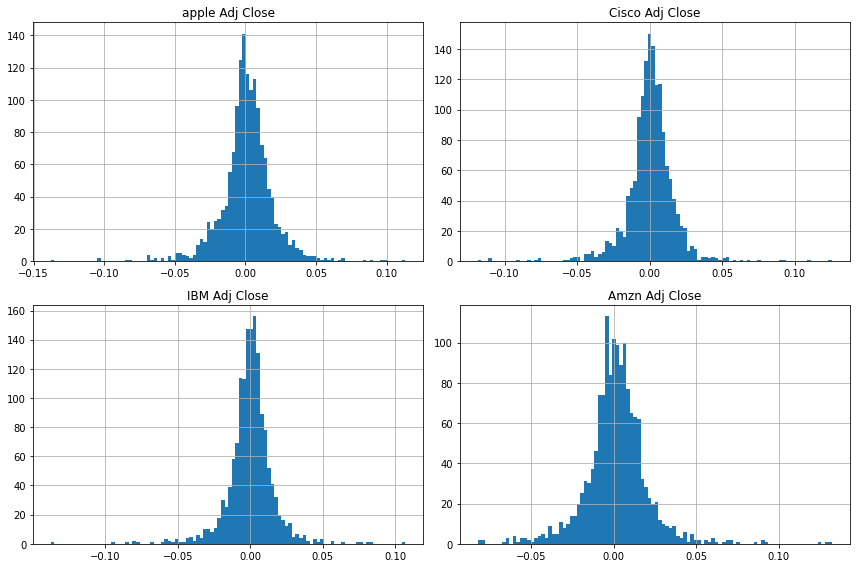

In [ ]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [ ]:
log_ret.mean()

apple Adj Close    0.001083
Cisco Adj Close    0.000450
IBM Adj Close      0.000015
Amzn Adj Close     0.001525
dtype: float64

In [ ]:
log_ret.cov() *252 #multiply by busines days

,apple Adj Close,Cisco Adj Close,IBM Adj Close,Amzn Adj Close
apple Adj Close,0.088162,0.045159,0.035356,0.051085
Cisco Adj Close,0.045159,0.071534,0.040561,0.037688
IBM Adj Close,0.035356,0.040561,0.063511,0.027618
Amzn Adj Close,0.051085,0.037688,0.027618,0.094395


In [ ]:
np.random.seed(101)
print(stocks.columns)
weights=np.array(np.random.random(4))
print('random weights:'+ str(weights)+'\n and the sum of the weights:'+str(np.sum(weights)))
print('rebalance the weights')
re_weights = weights/np.sum(weights)
print('rebalanced weights are:'+ str(re_weights)+'\nand the sum of the rebalanced weights:'+str(np.sum(re_weights)))
print('\n expected return')
# expected returns
exp_logret = np.sum((log_ret.mean()*re_weights)*252)
print(exp_logret)
# expected volitility
print('\n expected volitility')
exp_vol = np.sqrt(np.dot(re_weights.T,np.dot(log_ret.cov()*252,re_weights)))
print(exp_vol)
print('\n sharpe ratio')
SR = exp_logret/exp_vol
print(SR)

Index(['apple Adj Close', 'Cisco Adj Close', 'IBM Adj Close',
       'Amzn Adj Close'],
      dtype='object')
random weights:[0.51639863 0.57066759 0.02847423 0.17152166]
 and the sum of the weights:1.2870620972737856
rebalance the weights
rebalanced weights are:[0.40122278 0.44338777 0.02212343 0.13326603]
and the sum of the rebalanced weights:1.0000000000000002

 expected return
0.2110739727754673

 expected volitility
0.2398613202752938

 sharpe ratio
0.8799833692786037


In [ ]:
np.sum((log_ret.mean()*re_weights)*252)

0.2110739727754673

### making 10000 possible portfolios

In [ ]:
no_port=10000
all_weights=np.zeros((no_port,len(stocks.columns)))
ret_arr=np.zeros(no_port)
vol_arr=np.zeros(no_port)
SR_arr=np.zeros(no_port)
for index in range(no_port):
    weights=np.array(np.random.random(4))
    re_weights = weights/np.sum(weights)
    
    all_weights[index:]=re_weights
    # expected returns
    ret_arr[index] = np.sum((log_ret.mean()*re_weights)*252)
    # expected volitility
    vol_arr[index] = np.sqrt(np.dot(re_weights.T,np.dot(log_ret.cov()*252,re_weights)))
    SR_arr[index] = ret_arr[index]/vol_arr[index]

In [ ]:
SR_arr.max()

1.2632596727876095

In [ ]:
SR_arr.argmax()

2082

In [ ]:
all_weights[2082,:]

array([0.34569116, 0.00556055, 0.00937775, 0.63937054])

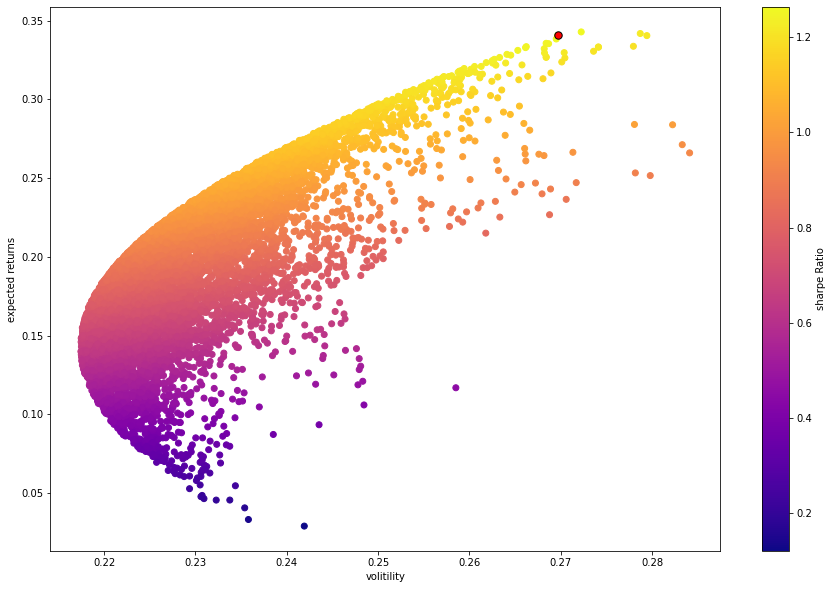

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(vol_arr,ret_arr,c=SR_arr,cmap='plasma')
plt.colorbar(label='sharpe Ratio')
plt.xlabel('volitility')
plt.ylabel('expected returns')
plt.scatter(vol_arr[2082],ret_arr[2082],c='red',s=55,edgecolor='black')

### now instead of random allocation we are going to use math to get the to most effcient portfolio 

In [ ]:
def get_ret_vol_SR(weights):
    weights=np.array(weights)
    ret=np.sum((log_ret.mean()*weights)*252)
    vol=np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    SR=ret/vol
    return np.array([ret,vol,SR])

In [ ]:
from scipy.optimize import minimize

In [ ]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [ ]:
def neg_sharpe(weights):
    return get_ret_vol_SR(weights)[2]*-1
# we have to minimize the neg sharpe ratio therefore this is the function we want to minimize

In [ ]:
# constraints we can help optimisation with constratins it will help it to calculate faster as there are constraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1
# this is goin to return 0 if your weights are 1 or else it will tell you how off are you from 1

In [ ]:
# create a variable for constraints , i am goin to create a tuple with a dictionary inside of it
cons = ({'type':'eq','fun': check_sum})
# this minimize function should return 0 for correct conditions
cons

{'fun': <function __main__.check_sum>, 'type': 'eq'}

In [ ]:
# we also have bounds this bounds is goin to be a tuple of tuples
bounds=((0,1),(0,1),(0,1),(0,1))
# we know sum has to be = 1, so we know that the weights have to be inbetween 0 and 1 

In [ ]:
initial_guess = [0.25,0.25,0.25,0.25]

In [ ]:
optimal_function=minimize(neg_sharpe,initial_guess,method='SLSQP',bounds=bounds,constraints=(cons))

In [ ]:
optimal_function

     fun: -1.2781081982896076
     jac: array([ 8.04662704e-06,  2.37670854e-01,  4.65978280e-01, -2.45869160e-06])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([2.35380592e-01, 1.31513724e-16, 0.00000000e+00, 7.64619408e-01])

In [ ]:
optimal_function.x

array([2.35380592e-01, 1.31513724e-16, 0.00000000e+00, 7.64619408e-01])

In [ ]:
get_ret_vol_SR(optimal_function.x)

array([0.35800738, 0.28010725, 1.2781082 ])

In [ ]:
frontier_y=np.linspace(0,0.35,100)

In [ ]:
def minimize_volitility(weights):
    return get_ret_vol_SR(weights)[1]

In [ ]:
frontier_volitility=[]
for possible_returns in frontier_y:
    cons=({'type':'eq','fun':check_sum},
          {'type':'eq','fun':lambda w : get_ret_vol_SR(w)[0] - possible_returns})
    
    result=minimize(minimize_volitility,initial_guess,method='SLSQP',bounds=bounds,constraints=cons)
    frontier_volitility.append(result['fun'])

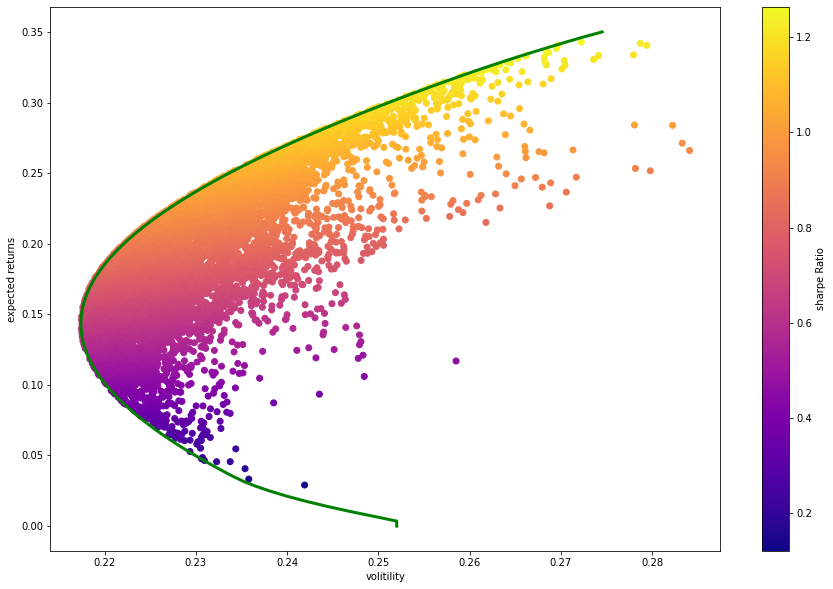

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(vol_arr,ret_arr,c=SR_arr,cmap='plasma')
plt.colorbar(label='sharpe Ratio')
plt.xlabel('volitility')
plt.ylabel('expected returns')
# plt.scatter(vol_arr[2082],ret_arr[2082],c='red',s=55,edgecolor='black')

plt.plot(frontier_volitility,frontier_y,'g-',linewidth=3)